In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from Functions import *

In [4]:
pay = pd.read_csv('F:\\Downloads\\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\\dseb63_installments_payments.csv')

In [5]:
pay.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0


# Pre check overall Dataframe

In [6]:
pay_check = pre_check_tool(pay)
pay_check.split_data()

In [7]:
# Check null percent
pay_check.check_per_null()

,number_missing,percent_missing
DAYS_ENTRY_PAYMENT,1639,0.021163
AMT_PAYMENT,1639,0.021163
AMT_INSTALMENT,1,0.000013
SK_ID_CURR,1,0.000013


In [8]:
# find cols that have null > 90%
print(pay_check.find_null_cols(0.9))

Index([], dtype='object')


NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

In [9]:
#duplicate check
pay.duplicated().sum()

0

In [10]:
# valid value
## Num data
pay_check.check_value_num()
print('\n\n\n')

## cat data
pay_check.check_value_cat()

SK_ID_PREV  has     >0 7744758,  =0 0  ,   <0 0,    nan: 0,   other values: 0
NUM_INSTALMENT_VERSION  has     >0 5280831,  =0 2463927  ,   <0 0,    nan: 0,   other values: 0
NUM_INSTALMENT_NUMBER  has     >0 7744758,  =0 0  ,   <0 0,    nan: 0,   other values: 0
DAYS_INSTALMENT  has     >0 0,  =0 0  ,   <0 7744758,    nan: 0,   other values: 0
DAYS_ENTRY_PAYMENT  has     >0 0,  =0 0  ,   <0 7743119,    nan: 1639,   other values: 0
AMT_INSTALMENT  has     >0 7744570,  =0 187  ,   <0 0,    nan: 1,   other values: 0
AMT_PAYMENT  has     >0 7742222,  =0 897  ,   <0 0,    nan: 1639,   other values: 0
SK_ID_CURR  has     >0 7744727,  =0 30  ,   <0 0,    nan: 1,   other values: 0






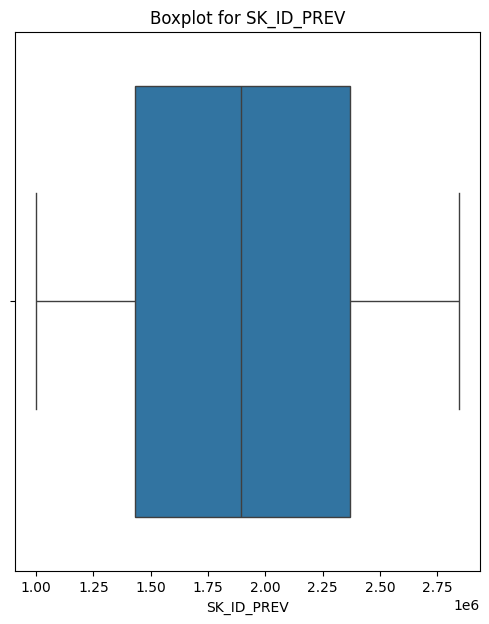

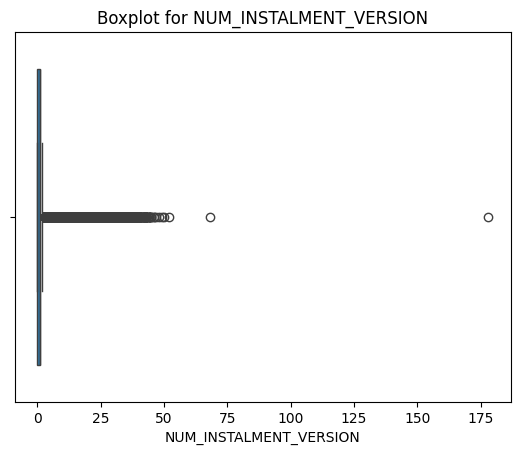

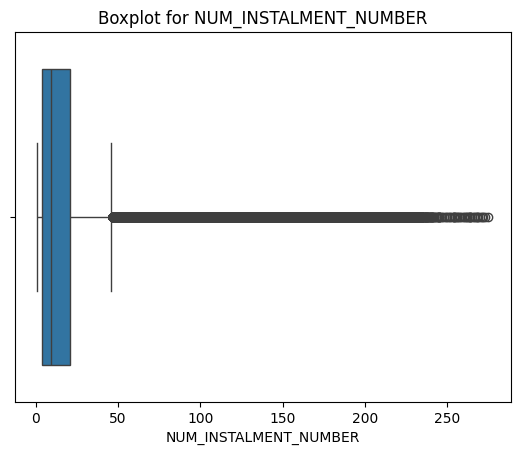

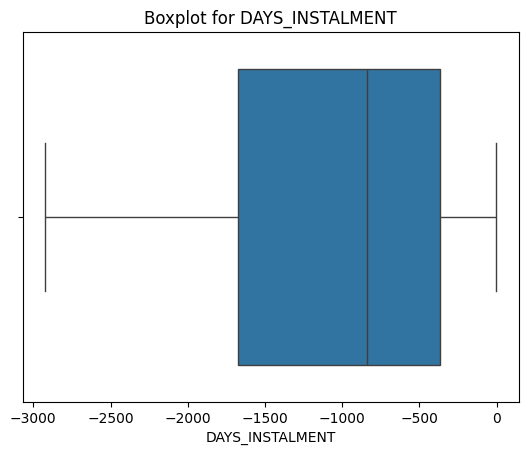

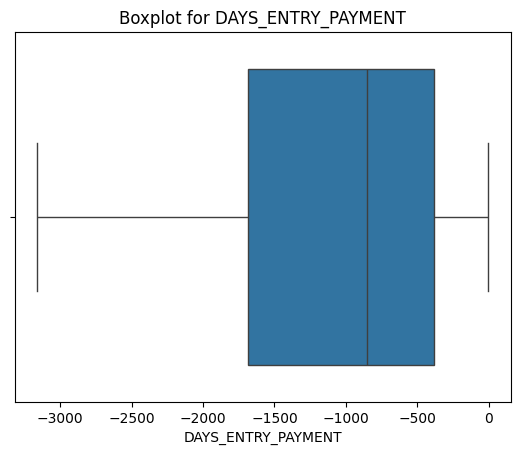

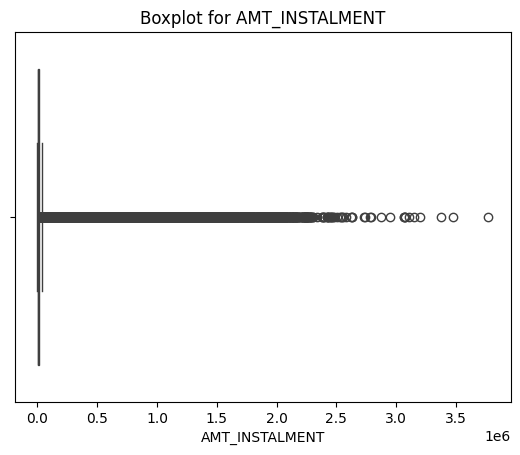

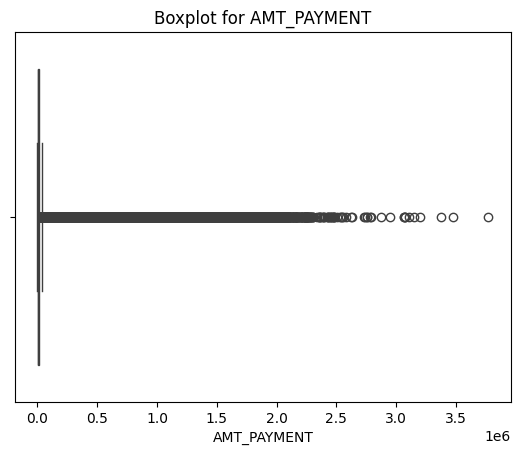

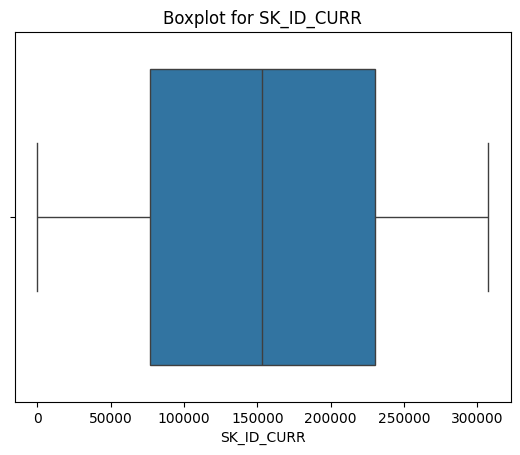

In [11]:
# Outliers 
pay_check.show_outliers()

In [12]:
pay_check.dist_catchart()

'Categorical DF is not available'

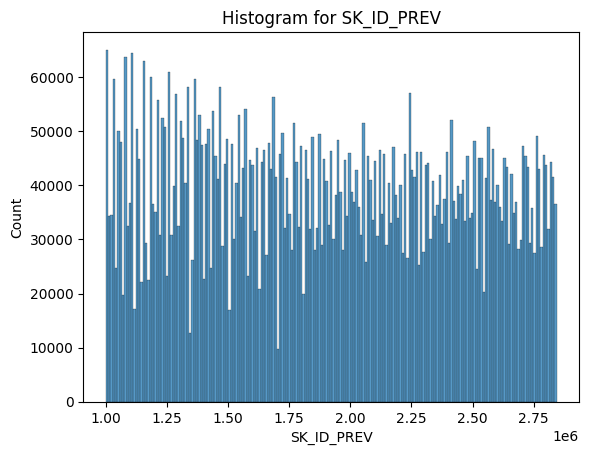

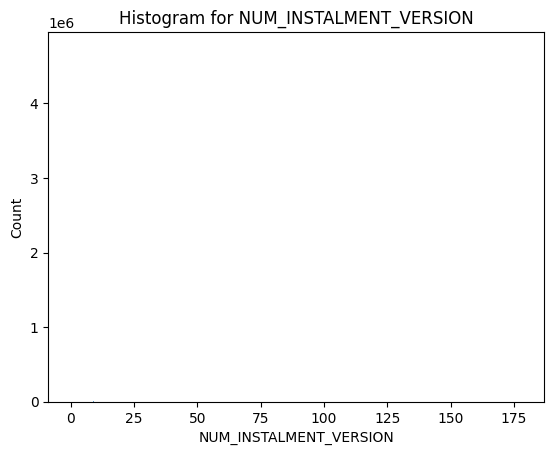

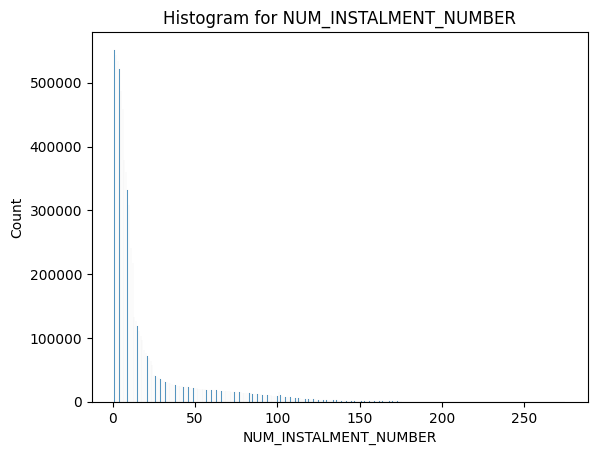

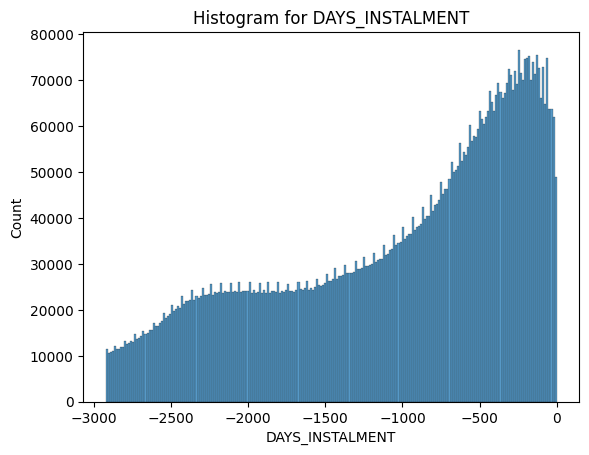

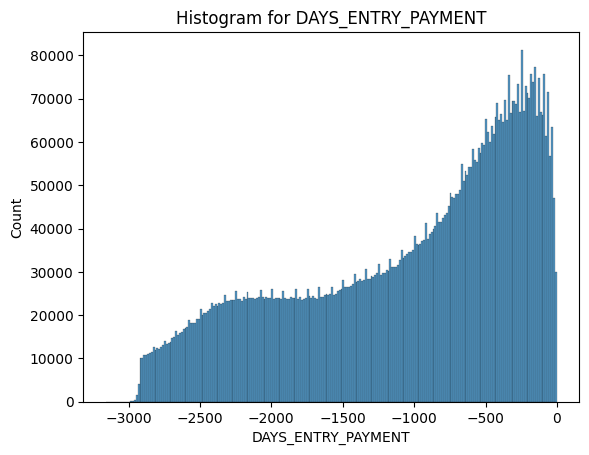

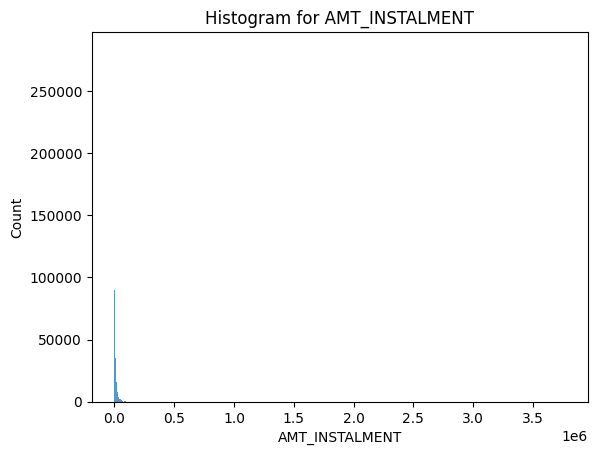

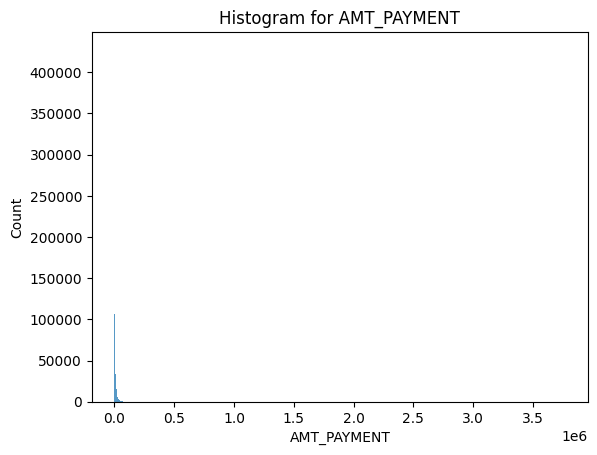

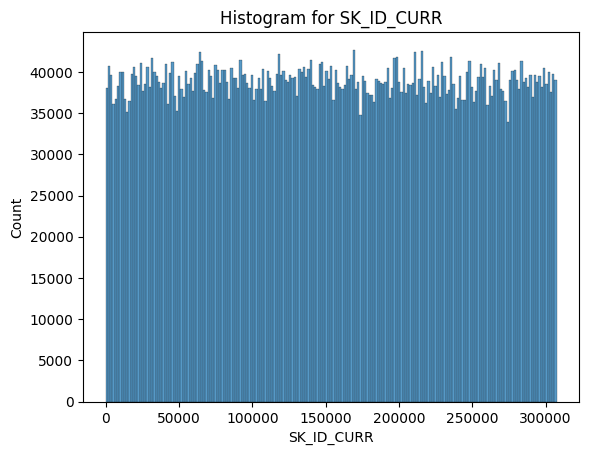

In [13]:
pay_check.dist_numchart()

# Data Exploration

# EDA Internal

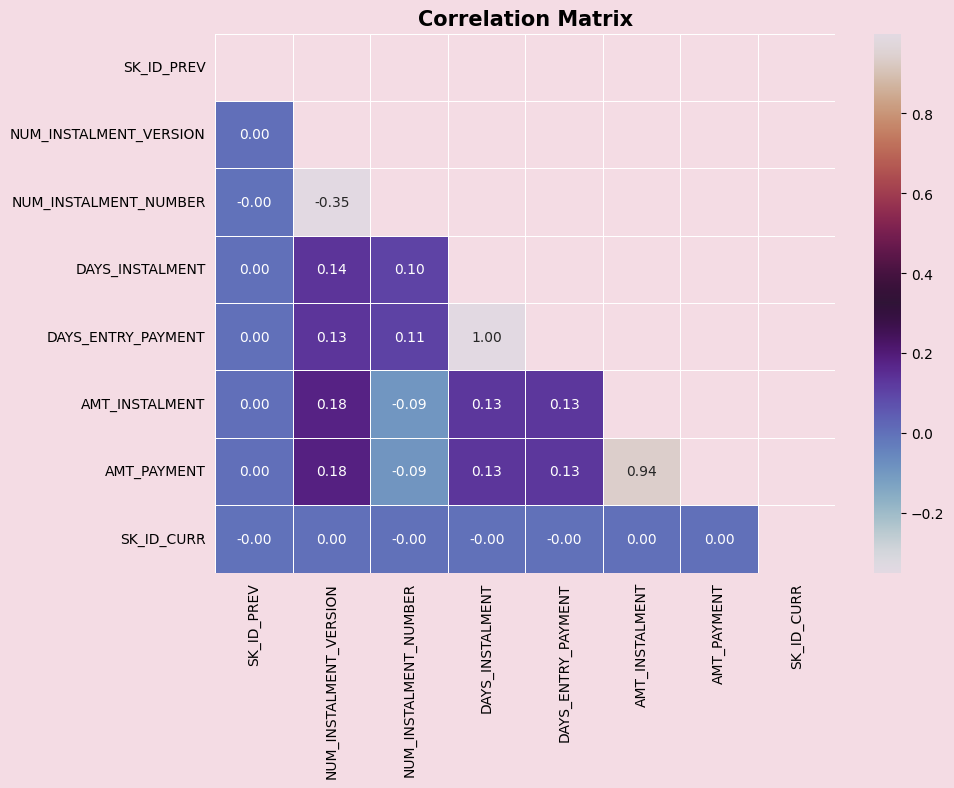

In [14]:
num = pay_check.numdf
cat = pay_check.catdf
# Correlation
draw_corr(num)

### Features that have high correlation: 
* DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT (1.0)
* AMT_INSTALMENT- AMT_PAYMENT (0.94)

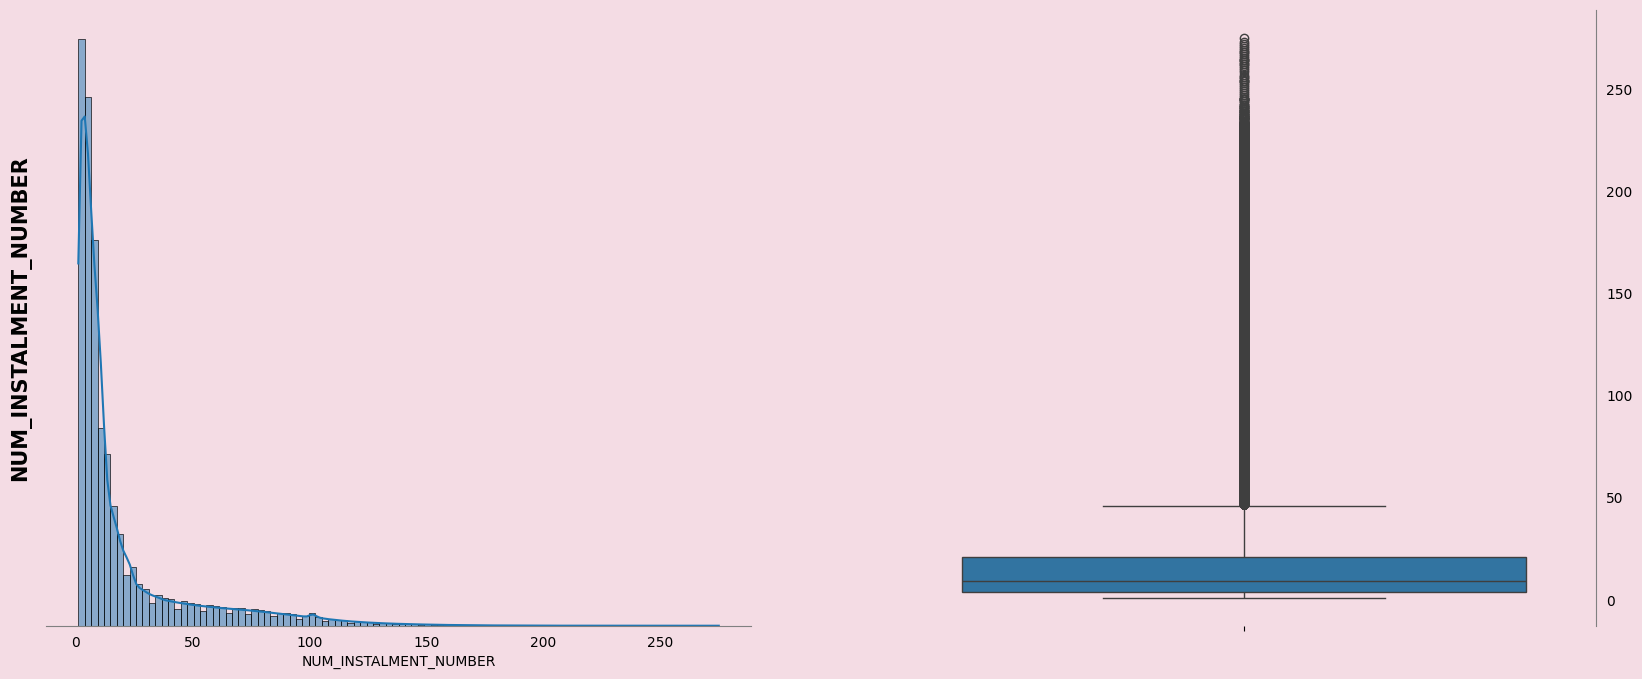

In [15]:
obj1_int = Univariate_Analysis(df= pay , col= 'NUM_INSTALMENT_NUMBER', num= True)
obj1_int.visualize()

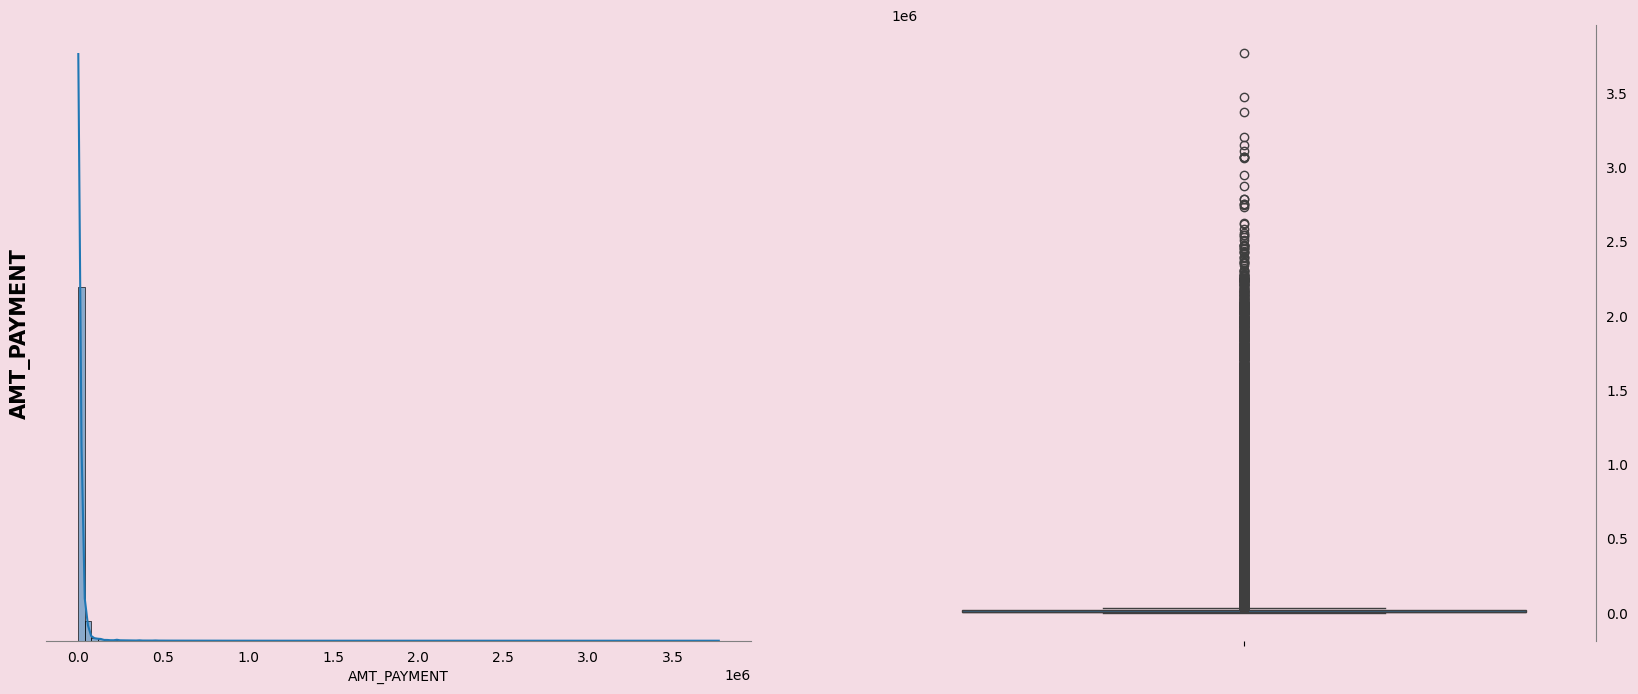

In [16]:
obj2_int = Univariate_Analysis(df= pay , col= 'AMT_PAYMENT', num= True)
obj2_int.visualize()

* Most of the clients complete their instalment payment before 25 months.
* Most of the clients paid less than 5 lakh on previous credit on the same installment.

# EDA External

In [17]:
app_train = pd.read_csv('F:\\Downloads\dseb-63-data-preparation-final-project\\dseb63_final_project_DP_dataset\dseb63_application_train.csv')
app_train = app_train[['SK_ID_CURR','TARGET']]

In [18]:
merge_table = pd.merge(pay,app_train,on='SK_ID_CURR',how='left')
merge_table

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR,TARGET
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0,0.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0,0.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0,0.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0,0.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0,0.0
...,...,...,...,...,...,...,...,...,...
7744753,2192667,1.0,6,-2352.0,-2352.0,5322.240,5322.240,21216.0,0.0
7744754,2208281,1.0,4,-452.0,-466.0,63195.435,63195.435,21216.0,0.0
7744755,2657771,0.0,3,-2907.0,-2932.0,3375.000,3375.000,21216.0,0.0
7744756,2657771,0.0,47,-1871.0,-1871.0,4915.890,4915.890,21216.0,0.0


#### Calculating days over due

In [19]:
merge_table['DPD'] = merge_table['DAYS_ENTRY_PAYMENT'] - pay['DAYS_INSTALMENT']
merge_table['DPD'] = merge_table['DPD'].apply(lambda x: x if x > 0 else 0)

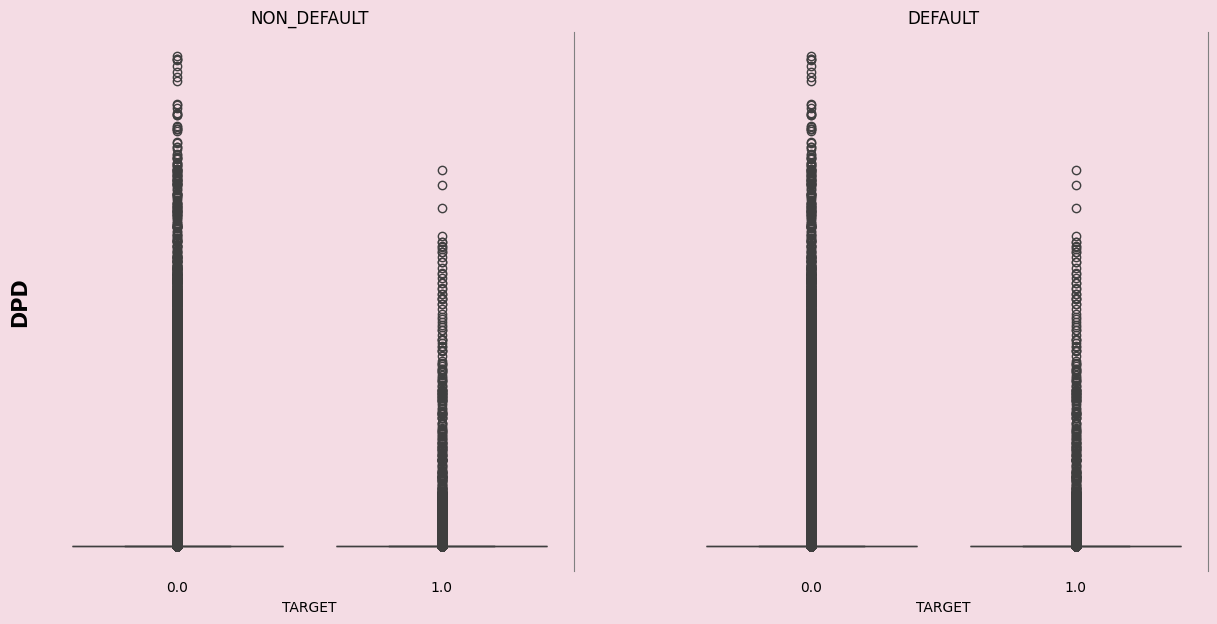

In [20]:
obj1 = Bivariate_Analysis(df = merge_table, col1= 'DPD', num=True)
obj1.plotboxplot()

#### Calculating days before due

In [23]:
merge_table['DBD'] = merge_table['DAYS_INSTALMENT'] - pay['DAYS_ENTRY_PAYMENT']
merge_table['DBD'] = merge_table['DBD'].apply(lambda x: x if x > 0 else 0)

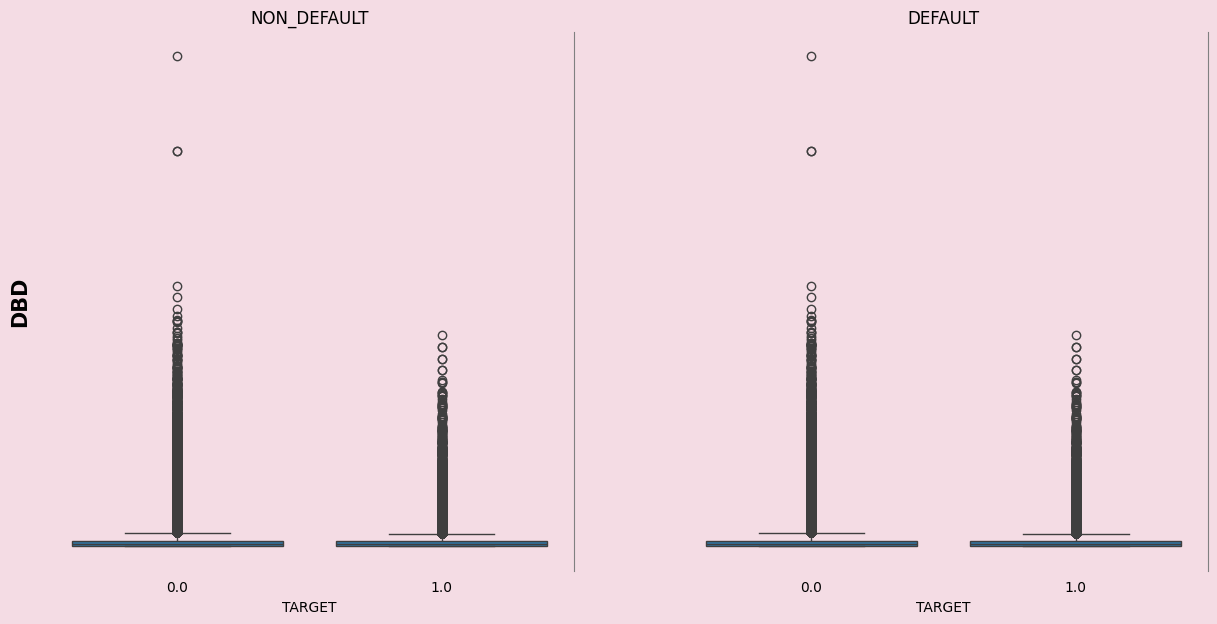

In [26]:
obj2 = Bivariate_Analysis(df = merge_table, col1= 'DBD', num=True)
obj2.plotboxplot()

#### FLAGGING ON TIME

In [27]:
merge_table['ON_TIME_FLAG'] = merge_table["DPD"].apply(lambda x: 1 if x == 0 else 0)

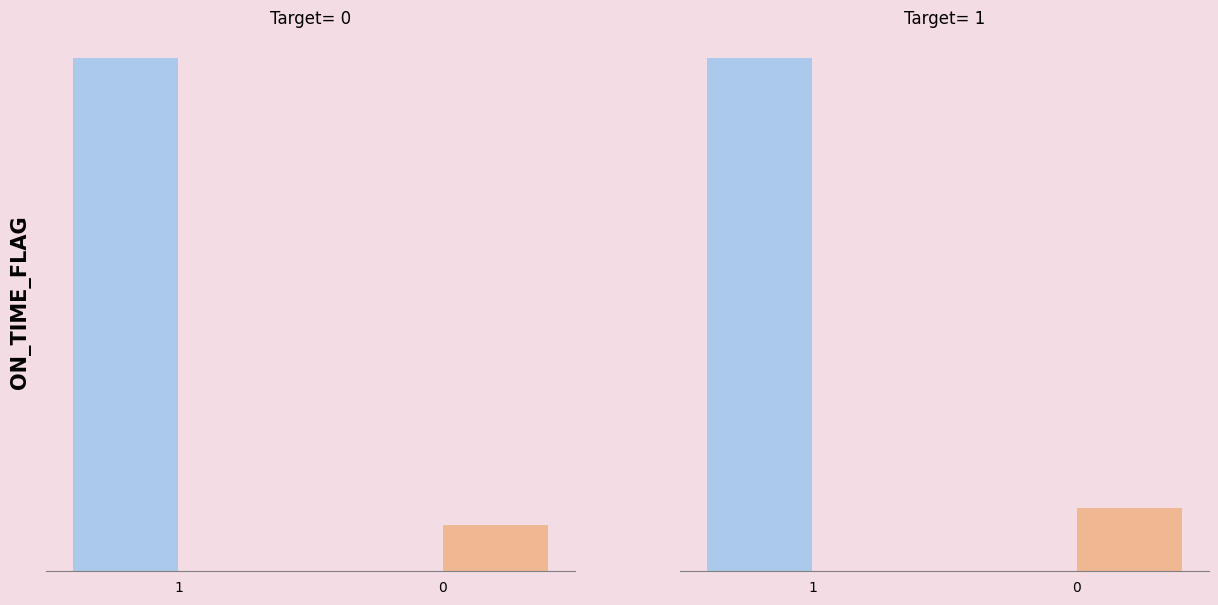

In [28]:
obj3 = Bivariate_Analysis(df = merge_table, col1= 'ON_TIME_FLAG', num=False)
obj3.countplot()

####  SUM ON TIME

In [29]:
merge_table['ON_TIME_SUM'] = merge_table.groupby(['SK_ID_CURR'])['ON_TIME_FLAG'].transform('sum')

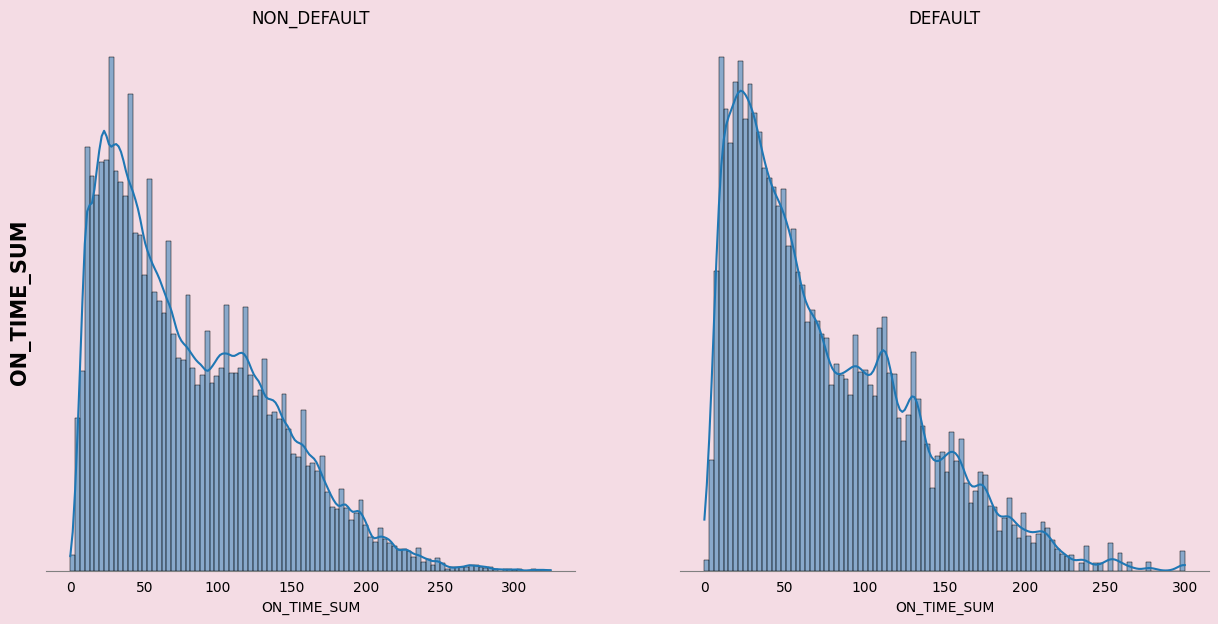

In [34]:
obj4 = Bivariate_Analysis(df = merge_table, col1= 'ON_TIME_SUM', num=True)
obj4.plothistogram()

#### PAYMENT COUNT

In [31]:
merge_table['INS_COUNT'] = merge_table.groupby(['SK_ID_CURR'])['ON_TIME_FLAG'].transform('count')

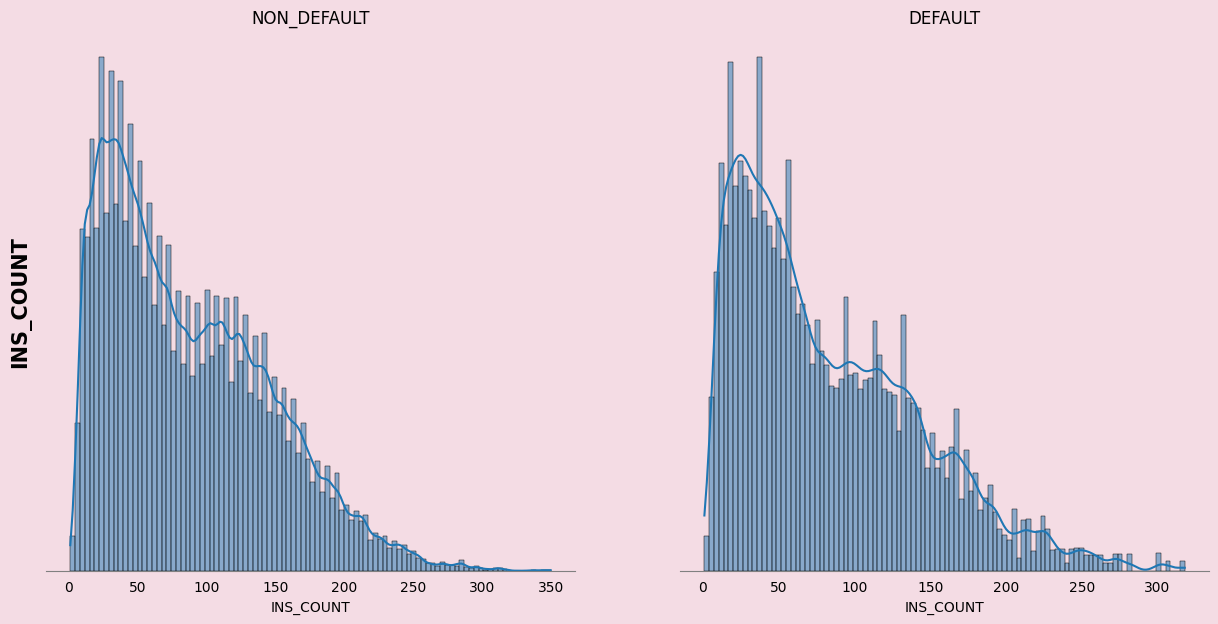

In [36]:
obj5 = Bivariate_Analysis(df = merge_table, col1= 'INS_COUNT', num=True)
obj5.plothistogram()